In [10]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set()

In [11]:
conn = sqlite3.connect("chinook.db")

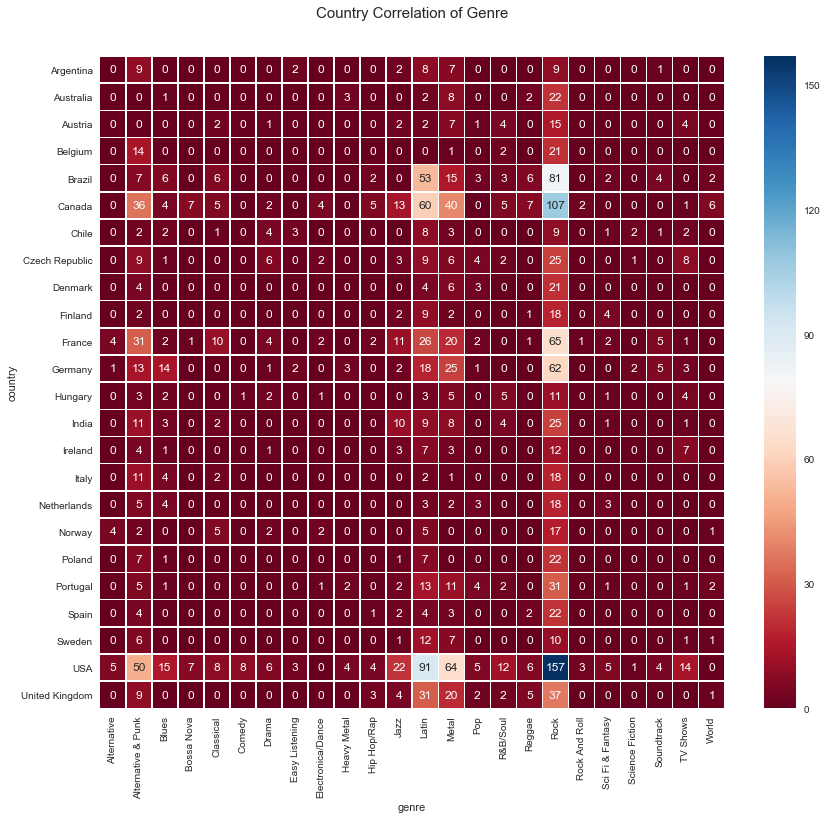

In [12]:
sql = (
    'SELECT C.Country as country, G.Name AS genre, count(*) as qty '
    'FROM Invoice I '
    'INNER JOIN InvoiceLine L ON I.InvoiceId = L.InvoiceId '
    'INNER JOIN Track T ON L.TrackId = T.TrackId '
    'INNER JOIN Genre G ON T.GenreId = G.GenreId '
    'INNER JOIN Customer C ON I.CustomerId = C.CustomerId '
    'GROUP BY 1, 2 '
    'ORDER BY 1, 2, 3 DESC'
)

df = pd.read_sql_query(sql, conn)

pivot = df.pivot(index='country', columns='genre', values='qty')
pivot.fillna(0, inplace=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Country Correlation of Genre', y=1.05, size=15)
sns.heatmap(pivot, annot=True, fmt="g", linewidths=.5, cmap=colormap)

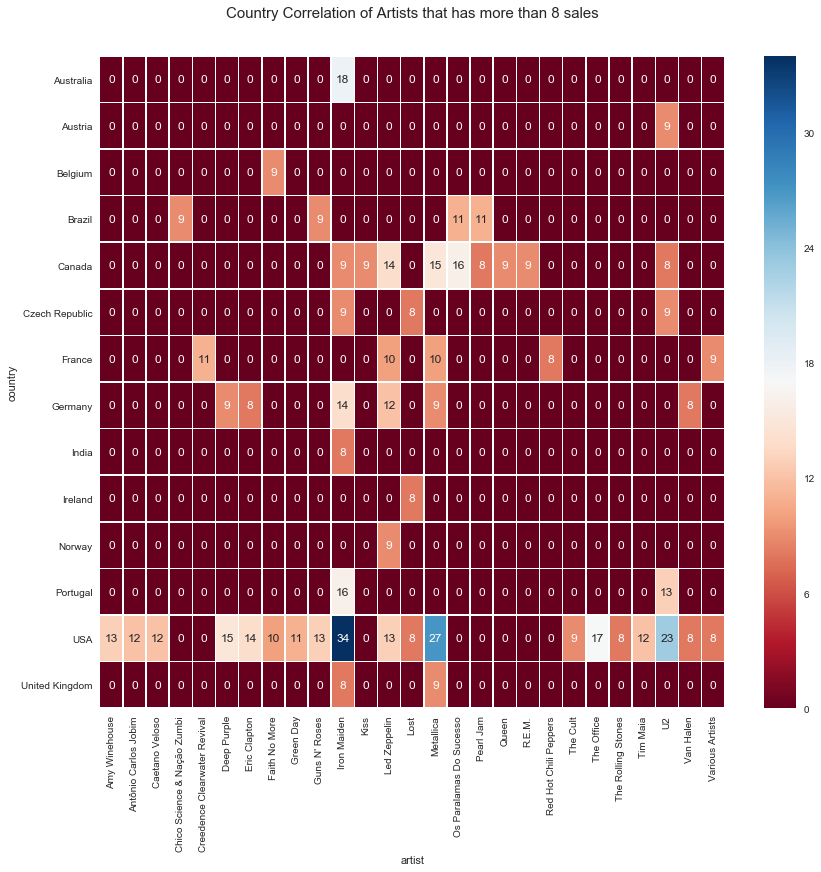

In [49]:
sql = (
    'SELECT ' 
    '      C.Country as country '
    '    , A2.Name AS artist '
    '    , count(I.InvoiceId) as qty '
    'FROM Invoice I '
    'INNER JOIN InvoiceLine L ON I.InvoiceId = L.InvoiceId '
    'INNER JOIN Track T ON L.TrackId = T.TrackId '
    'INNER JOIN Album A ON T.AlbumId = A.AlbumId '
    'INNER JOIN Artist A2 ON A.ArtistId = A2.ArtistId '
    'INNER JOIN Customer C ON I.CustomerId = C.CustomerId '
    'GROUP BY 1, 2 '
    'HAVING count(I.InvoiceId) >= 8 '
    'ORDER BY 1, 2, 3 DESC '
)

df = pd.read_sql_query(sql, conn)

pivot = df.pivot(index='country', columns='artist', values='qty')
pivot.fillna(0, inplace=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Country Correlation of Artists that has more than 8 sales', y=1.05, size=15)
sns.heatmap(pivot, annot=True, fmt="g", linewidths=.5, cmap=colormap)

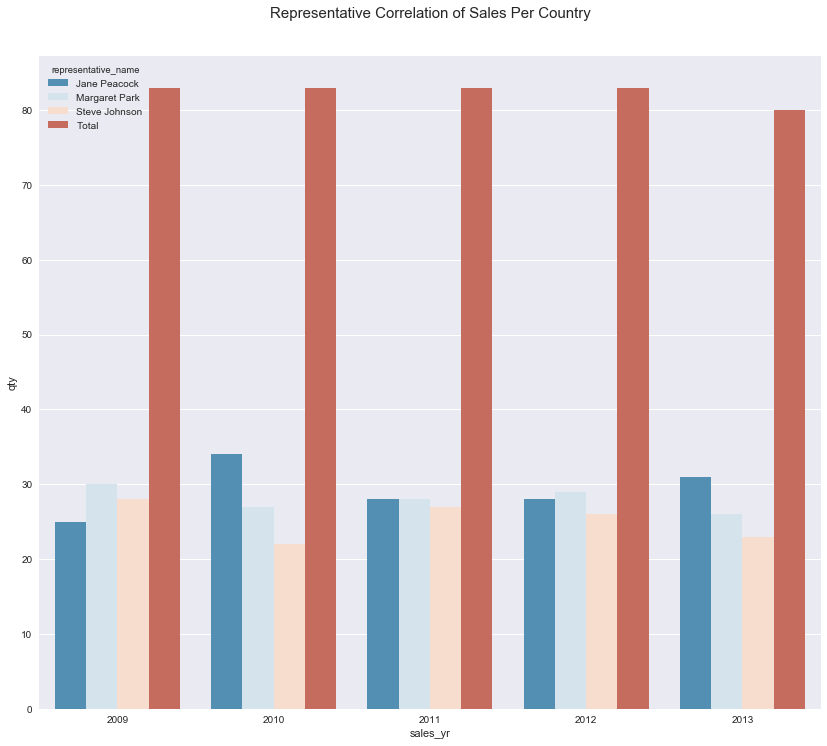

In [33]:
sql = (
    'SELECT '
    '  E.FirstName || \' \' || E.LastName AS representative_name, '
    '  strftime(\'%Y\', I.InvoiceDate) as sales_yr, '
    '  count(I.InvoiceId) as qty '
    'FROM Employee e '
    'INNER JOIN Customer C ON e.EmployeeId = C.SupportRepId '
    'INNER JOIN Invoice I ON C.CustomerId = I.CustomerId '
    'WHERE e.Title = \'Sales Support Agent\' '
    'GROUP BY 1, 2 '
    'UNION '
    'SELECT '
       '\'Total\', '
       'strftime(\'%Y\', InvoiceDate) as sales_yr, '
       'count(InvoiceId) as qty '
    'FROM Invoice '
    'GROUP BY 1, 2'
)

df = pd.read_sql_query(sql, conn)

plt.figure(figsize=(14,12))
plt.title('Representative Correlation of Sales Per Country', y=1.05, size=15)

sns.barplot(x="sales_yr", y="qty", hue="representative_name", data=df, palette="RdBu_r")

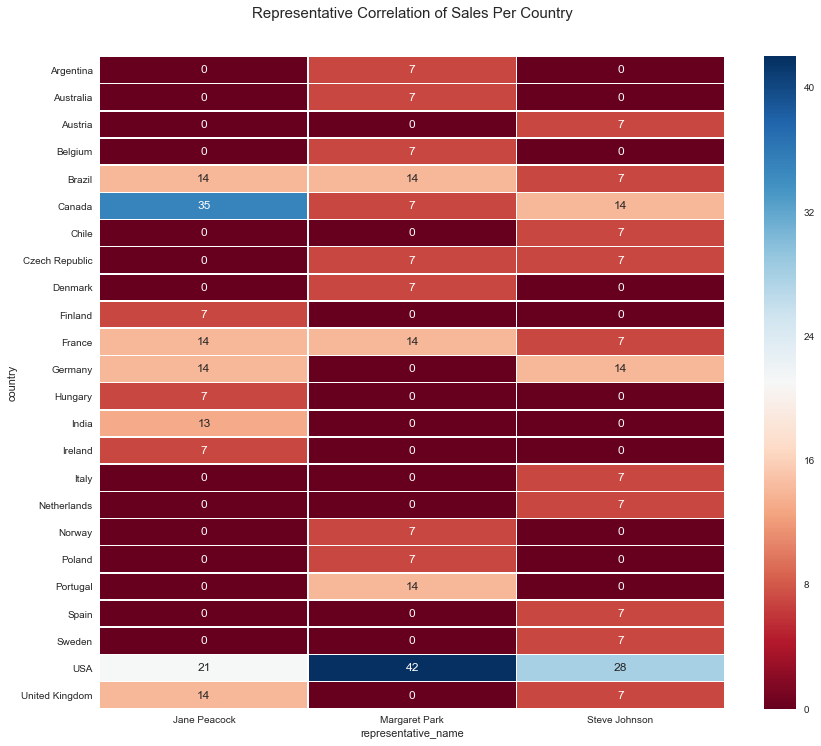

In [14]:
sql = (
    'SELECT ' 
        'coalesce(C.Country, \'No sales\') as country, '
        'E.FirstName || \' \' || E.LastName AS representative_name, '
        'count(I.InvoiceId) as qty '
    'FROM Employee e '
    'LEFT JOIN Customer C ON e.EmployeeId = C.SupportRepId '
    'LEFT JOIN Invoice I ON C.CustomerId = I.CustomerId '
    'WHERE e.Title = \'Sales Support Agent\' '
    'GROUP BY 1, 2 '
    'ORDER BY 1, 2, 3 DESC'
)

df = pd.read_sql_query(sql, conn)

pivot = df.pivot(index='country', columns='representative_name', values='qty')
pivot.fillna(0, inplace=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Representative Correlation of Sales Per Country', y=1.05, size=15)
sns.heatmap(pivot, annot=True, fmt="g", linewidths=.5, cmap=colormap)